In [177]:
from collections import deque
import random
import matplotlib.pyplot as plt

In [178]:
def get_page_number(reference, page_size):
    return reference // page_size

def fifo_simulation(reference_string, num_frames, page_size):
    page_faults = 0
    memory = deque(maxlen=num_frames) 
    for reference in reference_string:
        page = get_page_number(reference, page_size)
        if page not in memory:
            if len(memory) == num_frames:
                memory.popleft()
            memory.append(page)
            page_faults += 1
    
    return page_faults


def aging_simulation(reference_string, num_frames, page_size):
    page_faults = 0
    memory = {}
    age = {} 
    
    for reference in reference_string:
        page = get_page_number(reference, page_size)
        if page not in memory:
            if len(memory) == num_frames:
                oldest_page = min(memory, key=lambda p: age[p])
                del memory[oldest_page]
                del age[oldest_page]
            memory[page] = True
            age[page] = 0
            page_faults += 1
        else:
            age[page] = (age[page] >> 1) | 0x80

        for p in list(age.keys()):
            if p not in memory:
                age[p] = age[p] >> 1

    return page_faults


In [179]:
def generate_reference_string(length, num_pages, page_size):
    return [random.randint(0, num_pages - 1) * page_size for _ in range(length)]

def compare_algorithms(num_frames_list, reference_length, num_pages, page_size):
    fifo_faults = []
    aging_faults = []
    
    reference_string = generate_reference_string(reference_length, num_pages, page_size)
    
    for num_frames in num_frames_list:
        fifo_faults.append(fifo_simulation(reference_string, num_frames, page_size))
        aging_faults.append(aging_simulation(reference_string, num_frames, page_size))
    
    plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in fifo_faults], label='FIFO')
    plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in aging_faults], label='Aging')
    plt.xlabel('Número de Molduras de Página')
    plt.ylabel('Faltas de Página por 1000 Referências')
    plt.legend()
    plt.title('FIFO vs Aging') 
    plt.show()


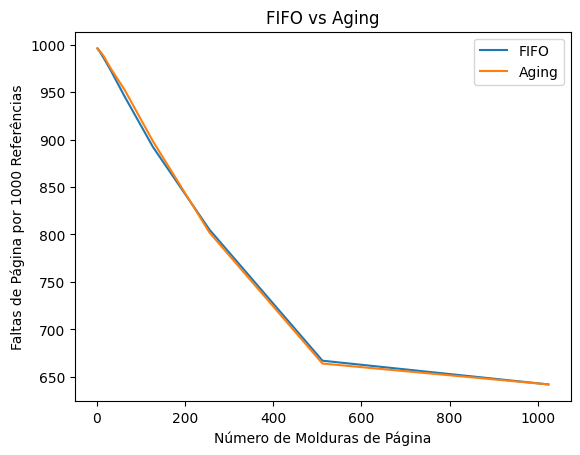

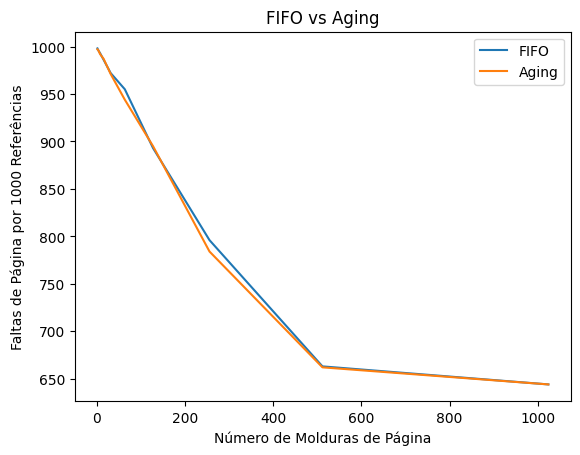

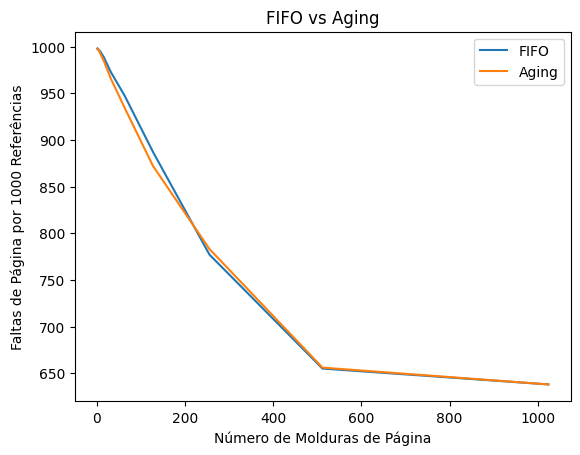

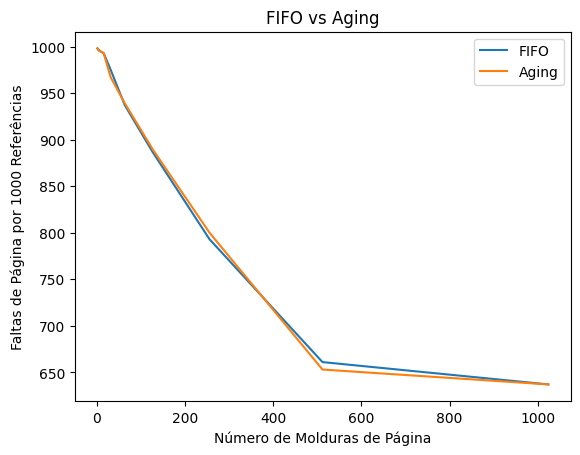

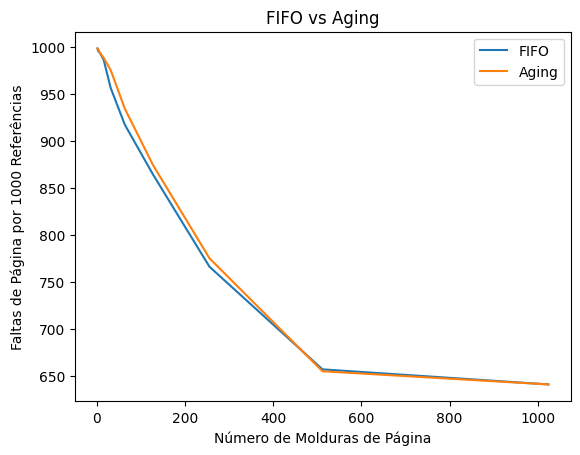

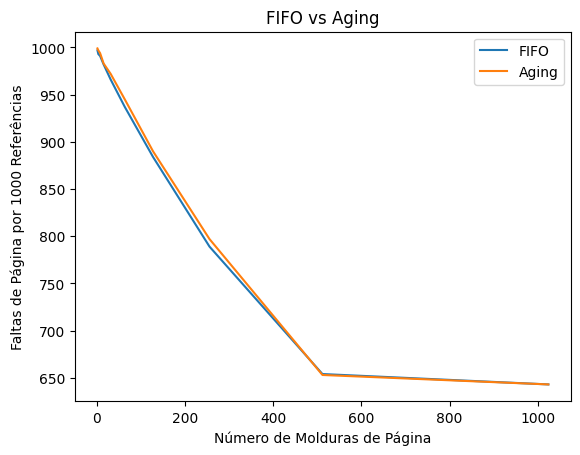

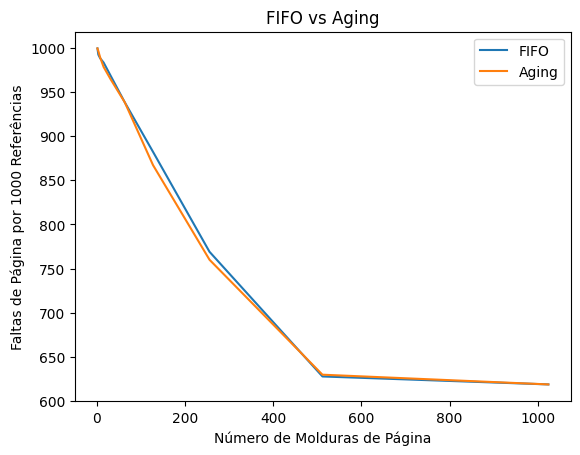

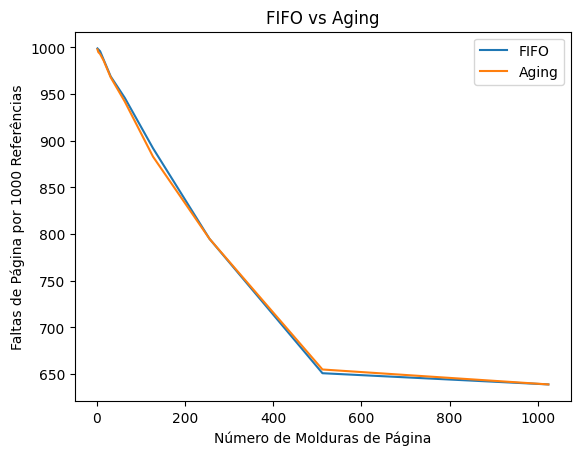

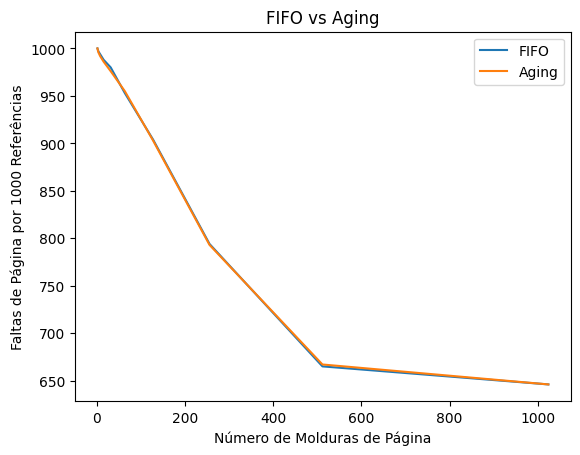

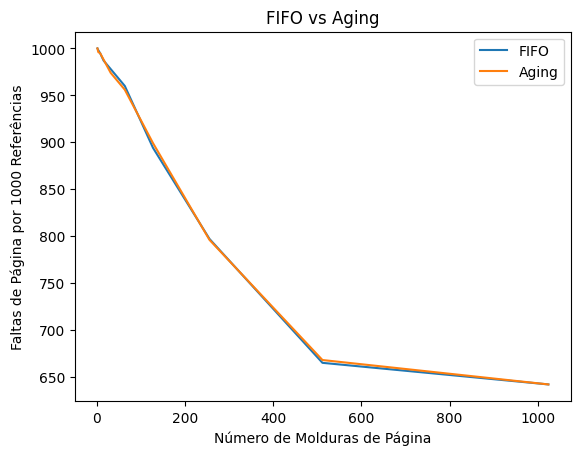

In [180]:
num_frames_list = [2**i for i in range(1, 11)]
reference_length = 1000
num_pages = 1024
page_size = 4096

for i in range(10):
  compare_algorithms(num_frames_list, reference_length, num_pages, page_size)

In [181]:
fifo_acumulate = []
aging_acumulate = []
qtd = 100
for i in range(qtd):
  print(i, end="\r")
  fifo_faults = []
  aging_faults = []

  reference_string = generate_reference_string(reference_length, num_pages, page_size)

  for num_frames in num_frames_list:
    fifo_faults.append(fifo_simulation(reference_string, num_frames, page_size))
    aging_faults.append(aging_simulation(reference_string, num_frames, page_size))

  fifo_acumulate.append(fifo_faults)
  aging_acumulate.append(aging_faults)

In [182]:
fifo_average = [sum(x) / qtd for x in zip(*fifo_acumulate)]
aging_average = [sum(x) / qtd for x in zip(*aging_acumulate)]

In [183]:
print(fifo_average)
print(aging_average)

[998.26, 996.41, 992.64, 984.36, 968.74, 939.95, 884.65, 785.76, 657.31, 638.42]
[998.19, 996.18, 992.5, 984.98, 969.4, 939.88, 883.9, 786.47, 657.32, 638.42]


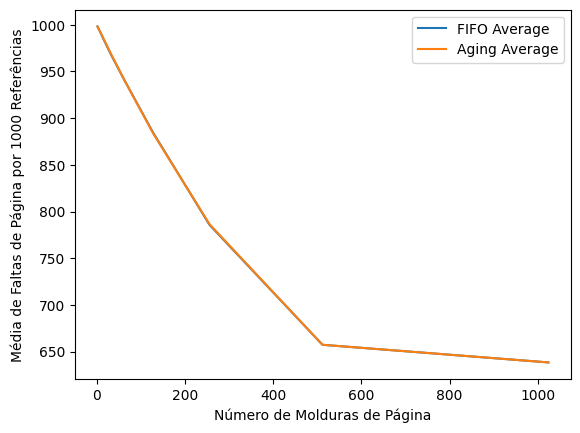

In [184]:
plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in fifo_average], label='FIFO Average')
plt.plot(num_frames_list, [faults / reference_length * 1000 for faults in aging_average], label='Aging Average')
plt.legend()
plt.xlabel('Número de Molduras de Página')
plt.ylabel('Média de Faltas de Página por 1000 Referências')
plt.show()
